In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

In [3]:
print(f"行数: {df.shape[0]}, 列数: {df.shape[1]}")
print()
print(df.head())
print()
print(df.info())
print()
print(df.describe())

行数: 920, 列数: 16

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

## データ概要（UCI Heart Disease Data — 4施設統合版）
- **920件**, **16列**
- 収集施設: Cleveland, Hungary, Switzerland, VA Long Beach

| 列名 | 意味 | 型・値 |
|------|------|--------|
| id | 患者ID | 整数（分析には不要） |
| age | 年齢 | 整数 |
| sex | 性別 | "Male" / "Female" |
| dataset | 収集施設 | "Cleveland" / "Hungary" / "Switzerland" / "VA Long Beach" |
| cp | 胸痛の種類 | "typical angina" / "atypical angina" / "non-anginal" / "asymptomatic" |
| trestbps | 安静時血圧 (mmHg) | 浮動小数（欠損あり） |
| chol | 血清コレステロール (mg/dl) | 浮動小数（欠損あり） |
| fbs | 空腹時血糖 > 120mg/dl | True / False（欠損あり） |
| restecg | 安静時心電図 | "normal" / "lv hypertrophy" / "st-t abnormality" |
| thalch | 最大心拍数 | 浮動小数（欠損あり） |
| exang | 運動誘発性狭心症 | True / False（欠損あり） |
| oldpeak | ST低下（運動時 vs 安静時） | 浮動小数（欠損あり） |
| slope | ST区間の傾斜 | "upsloping" / "flat" / "downsloping"（欠損多） |
| ca | 透視で着色された主要血管数 | 0-3（**欠損が非常に多い**） |
| thal | サラセミア | "normal" / "fixed defect" / "reversable defect"（**欠損多**） |
| num | **心臓病の重症度** | **0=なし, 1-4=あり（重症度）→ 二値化して使う** |


In [4]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
print(df["num"].value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [6]:
df["target"] = (df["num"] >= 1).astype(int)

print(df["target"].value_counts())
print(f"\n心臓病あり: {df["target"].mean():.1%}")

target
1    509
0    411
Name: count, dtype: int64

心臓病あり: 55.3%


In [7]:
missing = pd.DataFrame({
    "欠損数": df.isnull().sum(),
    "欠損率": (df.isnull().mean() * 100).round(1)
})
print(missing[missing["欠損数"] > 0].sort_values("欠損率", ascending=False))

          欠損数   欠損率
ca        611  66.4
thal      486  52.8
slope     309  33.6
fbs        90   9.8
oldpeak    62   6.7
trestbps   59   6.4
exang      55   6.0
thalch     55   6.0
chol       30   3.3
restecg     2   0.2


In [8]:
for site in df["dataset"].unique():
    subset = df[df["dataset"] == site]
    missing_pct = subset.isnull().mean().mean() * 100
    print(f"{site:15} | {len(subset):4}件 | 平均欠損率: {missing_pct:.1f}%")

Cleveland       |  304件 | 平均欠損率: 0.2%
Hungary         |  293件 | 平均欠損率: 15.6%
Switzerland     |  123件 | 平均欠損率: 13.1%
VA Long Beach   |  200件 | 平均欠損率: 20.5%


In [9]:
print("=== 全体 ===")
print(df["target"].value_counts())
print("\n=== 施設別の心臓病率===")
print(df.groupby("dataset")["target"].mean().round(2))

=== 全体 ===
target
1    509
0    411
Name: count, dtype: int64

=== 施設別の心臓病率===
dataset
Cleveland        0.46
Hungary          0.36
Switzerland      0.93
VA Long Beach    0.74
Name: target, dtype: float64


In [10]:
num_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]
print(df.groupby("target")[num_cols].mean().round(1))

         age  trestbps   chol  thalch  oldpeak
target                                        
0       50.5     129.9  227.9   148.8      0.4
1       55.9     134.0  176.5   128.3      1.3


In [11]:
# 性別 × target

print("=== 性別 × target ===")
print(pd.crosstab(df["sex"], df["target"], margins=True))

=== 性別 × target ===
target    0    1  All
sex                  
Female  144   50  194
Male    267  459  726
All     411  509  920


- 男性の方が心臓病の割合が高い
- 施設によって心臓病率が大きく異なる
- "ca"や"thal"は欠損が50%を超える

In [12]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

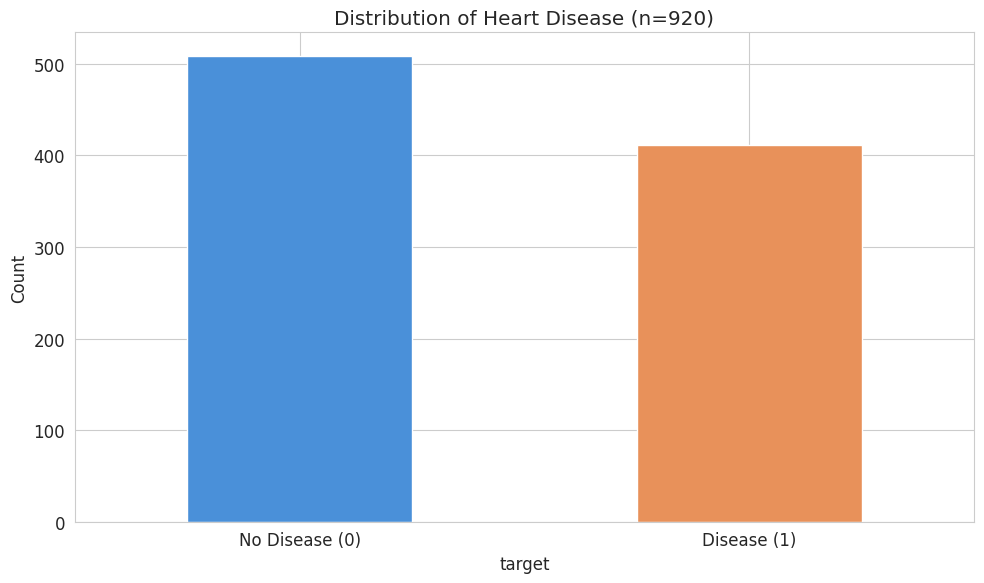

In [13]:
fig, ax = plt.subplots()
df["target"].value_counts().plot(kind="bar", color=["#4a90d9", "#e8915a"], ax=ax)
ax.set_xticklabels(["No Disease (0)", "Disease (1)"],rotation=0)
ax.set_ylabel("Count")
ax.set_title("Distribution of Heart Disease (n=920)")
plt.tight_layout()
plt.show()

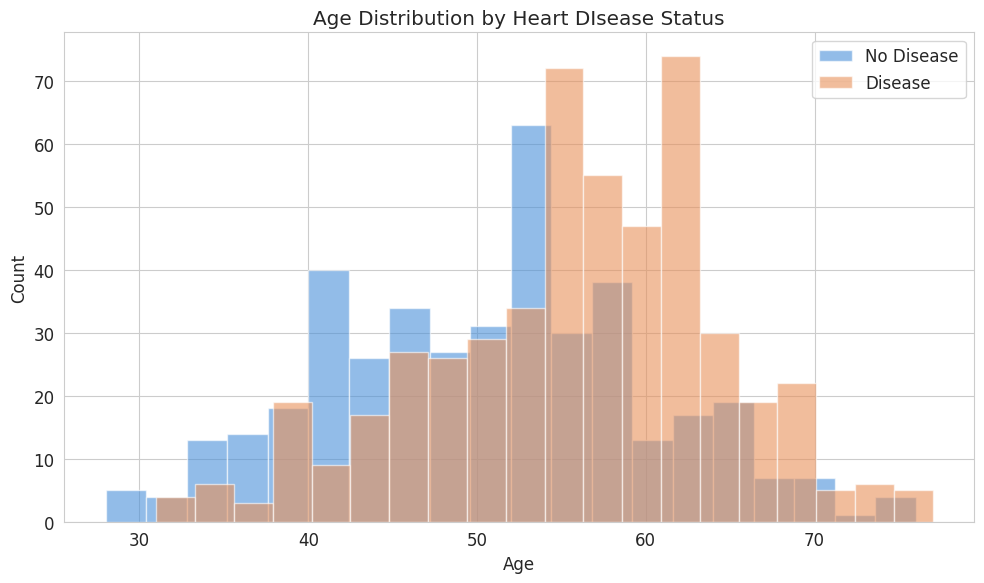

In [14]:
fig, ax = plt.subplots()
for t, color, label in [(0, "#4a90d9", "No Disease"), (1, "#e8915a", "Disease")]:
    ax.hist(df[df["target"] == t]["age"], bins=20, alpha=0.6, label=label, color=color)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Age Distribution by Heart DIsease Status")
ax.legend()
plt.tight_layout()
plt.show()

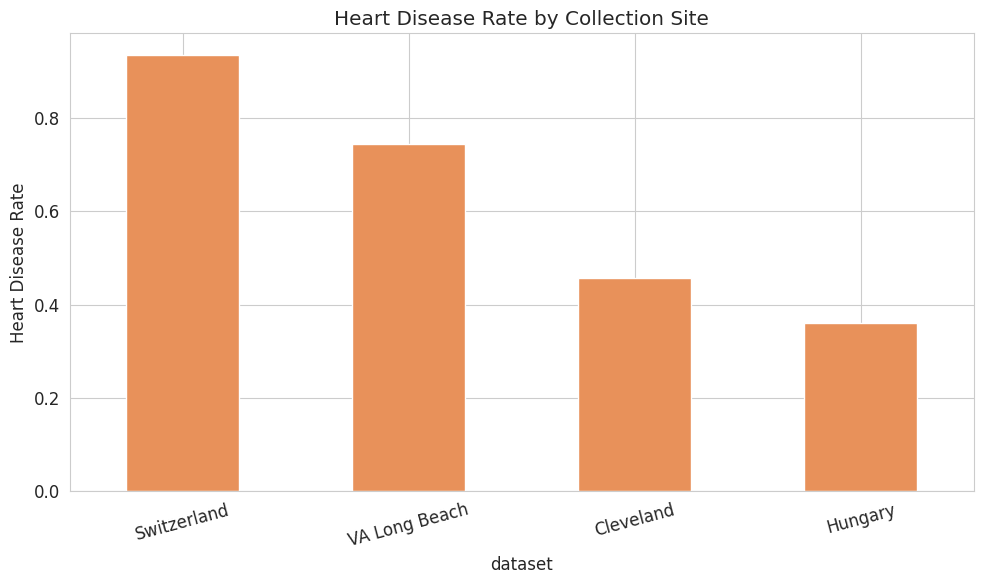

In [15]:
fig, ax = plt.subplots()
site_rate = df.groupby("dataset")["target"].mean().sort_values(ascending=False)
site_rate.plot(kind="bar", color="#e8915a", ax=ax)
ax.set_ylabel("Heart Disease Rate")
ax.set_title("Heart Disease Rate by Collection Site")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
plt.tight_layout()
plt.show()

心臓病の患者の割合はSwitzerlandが最大で,最小がHungaryである.両者の差はおよそ60%もある.
これには様々な理由が考えられる.
- 第一に患者の選択バイアスによる影響である。例えば、一括りに医療機関といっても、大学病院とクリニックでは施設の役割が違うように,ある施設で心臓病率が高かったとしても,それはその地域に心臓病が多いのではなく,単に重症患者が集まる施設だっただけかもしれないという可能性が十分に考えられる.
- 第二に診断基準の違いによる影響である.同じ「心臓病あり」の診断でも施設によって基準に厳しい・緩いが存在している可能性は施設間で基準が完全に統一されていない限り否定できない.

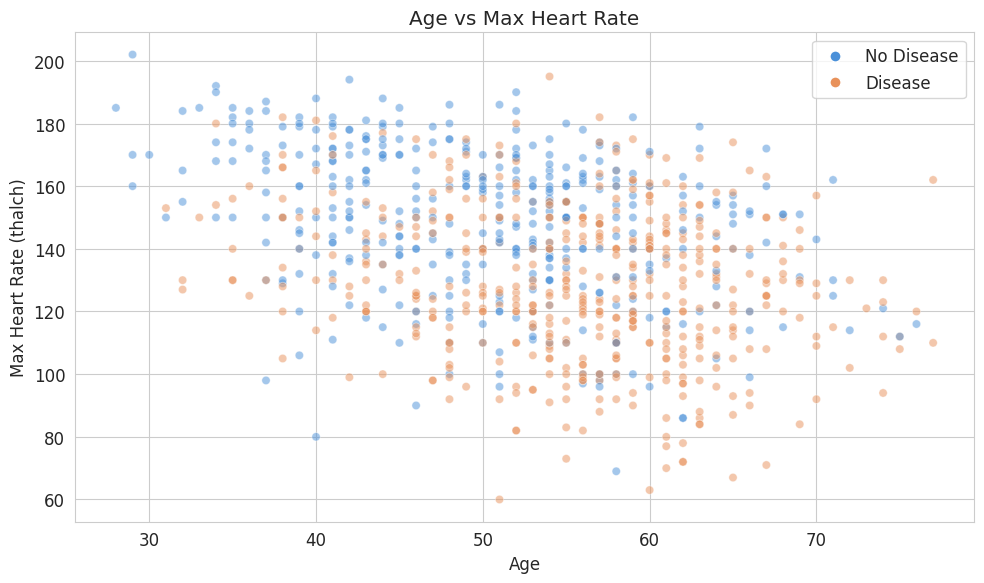

In [16]:
fig, ax = plt.subplots()

plot_df = df.dropna(subset=["thalch"])
colors = plot_df["target"].map({0: "#4a90d9", 1: "#e8915a"})
ax.scatter(plot_df["age"], plot_df["thalch"], c=colors, alpha=0.5, edgecolors="white", linewidth=0.5)
ax.set_xlabel("Age")
ax.set_ylabel("Max Heart Rate (thalch)")
ax.set_title("Age vs Max Heart Rate")

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0],[0], marker='o', color='w', markerfacecolor='#4a90d9', markersize=8, label='No Disease'),
    Line2D([0],[0], marker='o', color='w', markerfacecolor='#e8915a', markersize=8, label='Disease'),
]
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

- 年齢とともにMax Heart Rateは減少していく傾向にある.
- 心臓病がある人は心臓病がない人に比べてMax Heart Rateの値が小さい傾向にある.
  

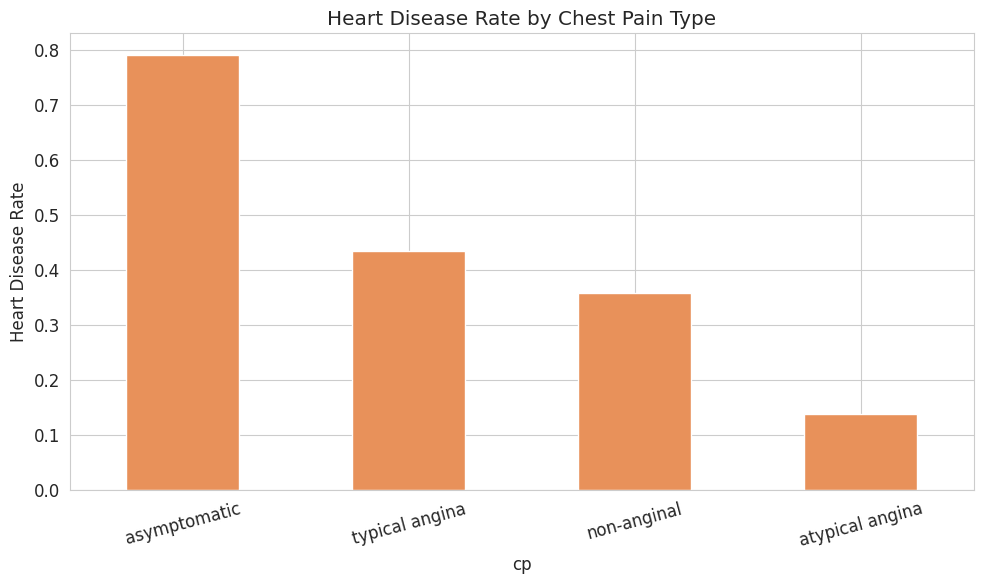

In [17]:
fig, ax = plt.subplots()
cp_rate = df.groupby("cp")["target"].mean().sort_values(ascending=False)
cp_rate.plot(kind="bar", color="#e8915a", ax=ax)
ax.set_ylabel("Heart Disease Rate")
ax.set_title("Heart Disease Rate by Chest Pain Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
plt.tight_layout()
plt.show()

In [18]:
astmptomatic群の心臓病率が最も高くなっている.
糖尿病の神経障害がある患者や高齢者などは痛みを感じにくく,胸痛なしで心筋虚血が進行することがあり,これをサイレント虚血という.
このデータはサイレント虚血の臨床的な重要性を反映している.
症状がないからこそ見落とされやすく、スクリーニングの意義があると考える.

SyntaxError: invalid character '、' (U+3001) (2557295419.py, line 4)

In [ ]:
#idは分析に不要であり、numはtargetに変換してあるため以下の二つの特徴量を除外する
df = df.drop(columns=["id", "num"])
#欠損値が50%を超えており、とても多いので、以下の二つの特徴量も今回は除外する
df = df.drop(columns=["ca", "thal"])

print(f"残りの列数: {len(df.columns)}")
print(df.columns.tolist())

In [ ]:
num_cols = ["trestbps", "chol", "thalch", "oldpeak"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = ["fbs", "restecg", "exang", "slope"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print(df.isnull().sum())

In [ ]:
cat_cols_to_encode = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope"]

df = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)

print(f"変換後の列数: {len(df.columns)}")
print(df.head())

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

print(f"特徴量: {X.shape}")
print(f"目的変数: {y.shape}")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"訓練: {X_train.shape[0]}件, テスト: {X_test.shape[0]}件")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("スケーリング完了")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print(f"訓練精度: {lr.score(X_train_scaled, y_train):.3f}")
print(f"テスト精度: {lr.score(X_test_scaled, y_test):.3f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# ランダムフォレストはスケーリング不要 → 元のデータを使う
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"訓練精度: {rf.score(X_train, y_train):.3f}")
print(f"テスト精度: {rf.score(X_test, y_test):.3f}")

In [ ]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8, 8))
importance.tail(15).plot(kind="barh", color="#5bb8a6", ax=ax)
ax.set_xlabel("Feature Importance")
ax.set_title("Random Forest - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=["No Disease", "Disease"]))

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=["No Disease", "Disease"]))


この中でもrecallは特に重要である.心臓病の見落とし(偽陰性)は命に関わるため,多少の偽陽性があってもrecallのスコアが高いモデルの方が臨床的に好ましい.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, y_pred, title in [
    (axes[0], y_pred_lr, "Logistic Regression"),
    (axes[1], y_pred_rf, "Random Forest"),
]:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Disease", "Disease"])
    disp.plot(ax=ax, cmap="Blues")
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
    ],
    "F1": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
    ],
}).round(3)

print(results.to_string(index=False))

## 考察

### モデルの比較
- ロジスティック回帰のテスト制度は82.6％,ランダムフォレストは83.7％であった.
- Recall(再現率)に注目すると,どちらも88.2％でほとんど優劣は見られなかった.

### 前処理上の判断
- ca(主要血管数)とthal(セラエセミア)は欠損率が50％を超えていたため除外した.
  これらは心臓病予測に重要な変数であるので欠損を補完する手法を使えば,精度向上が期待できる.

### 医学的観点からの解釈
- 特徴量重要度ではthalch(最大心拍数)とcp(胸痛タイプ)が上位であった.
- 無症状の胸痛タイプで心臓病率が最も高いことは,サイレント虚血の存在を示唆している.
- dataset(施設)関連の特徴料が特徴量重要度に含まれており,施設間の患者背景の違いが影響している可能性を示唆している.

### 今後の改善案
- ca, thal を含めた上での欠損値補完
- 交差検証による安定した評価
- ハイパラメータ調整